In [1]:
import allel
import h5py
import ingenos
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
base = \
"/afs/crc.nd.edu/group/BesanskyNGS/data05/comp_karyo/data/amplicon_sequencing/funestus/"

##### read in metadata

In [3]:
md_good = pd.read_excel((base + "metadata/TableS1 WGS for SNP Ascertainment_090520_BL.xlsx"),
                     sheet_name = "retained_specimens")

md_good.head()

,VCF_ID,Specimen_ID,Country,Village,Date of collection,2Ra-cyt,2Ra-PCA,3Ra-cyt,3Ra-PCA,3Rb-cyt,3Rb-PCA
0,Kuiti_00-01331_Kiribina,00-01331,Burkina Faso,Kuiti,2000-09-05 00:00:00,0,0.0,0,0.0,0,0.0
1,Kuiti_00-01332_Kiribina,00-01332,Burkina Faso,Kuiti,2000-09-05 00:00:00,0,0.0,0,0.0,0,0.0
2,Kuiti_00-01334_Kiribina,00-01334,Burkina Faso,Kuiti,2000-09-05 00:00:00,0,0.0,0,0.0,0,0.0
3,Kuiti_00-01396_Kiribina,00-01396,Burkina Faso,Kuiti,2000-09-06 00:00:00,0,0.0,0,0.0,0,0.0
4,Kuiti_00-01397_Kiribina,00-01397,Burkina Faso,Kuiti,2000-09-06 00:00:00,0,0.0,0,0.0,0,0.0


In [4]:
md_good.tail()

,VCF_ID,Specimen_ID,Country,Village,Date of collection,2Ra-cyt,2Ra-PCA,3Ra-cyt,3Ra-PCA,3Rb-cyt,3Rb-PCA
170,Ugf401,UgF401,Uganda,Tororo Amoni,2001,N,0.0,N,2.0,N,2.0
171,Ugf403,UgF403,Uganda,Tororo Amoni,2001,N,1.0,N,1.0,N,2.0
172,Zam281,Zam281,Zambia,Nyimba,2011,N,1.0,N,2.0,N,2.0
173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,NaN,NaN,NaN,NaN,N,30,NaN,15,NaN,18,NaN


In [5]:
md_good = md_good.loc[:172, :]
md_good.shape

(173, 11)

In [6]:
md_good.loc[md_good["VCF_ID"] == "Sabtenga_02-07110_Folonzo", 
            ["2Ra-cyt", "2Ra-PCA", "3Ra-cyt", "3Ra-PCA", "3Rb-cyt", 
             "3Rb-PCA"]]

,2Ra-cyt,2Ra-PCA,3Ra-cyt,3Ra-PCA,3Rb-cyt,3Rb-PCA
122,2,2.0,2,2.0,1,1.0


##### good.

In [7]:
md_dropped = pd.read_excel((base + "metadata/TableS1 WGS for SNP Ascertainment_090420_BL.xlsx"),
                     sheet_name = "dropped_specimens")

md_dropped.head()

,VCF_ID,Specimen_ID,Country,Village,Date of collection,2Ra-cyt,3Ra-cyt,3Rb-cyt,2Ra-PCA,3Ra-PCA,3Rb-PCA
0,Bagre_02-07350_Kiribina,02-07350,Burkina Faso,Bagre,2002-12-17,0,0,0,None,None,None
1,Bagre_02-07358_Kiribina,02-07358,Burkina Faso,Bagre,2002-12-17,0,0,0,None,None,None
2,Dirze_02-06753_Kiribina,02-06753,Burkina Faso,Dirze,2002-12-14,0,0,0,None,None,None
3,Dirze_02-06897_Kiribina,02-06897,Burkina Faso,Dirze,2002-12-14,0,0,0,None,None,None
4,Dirze_02-07217_Kiribina,02-07217,Burkina Faso,Dirze,2002-12-14,0,0,0,None,None,None


In [8]:
pd.concat([md_good, md_dropped[md_good.columns]]).shape

(201, 11)

In [9]:
md = pd.concat([md_good, md_dropped[md_good.columns]])

In [10]:
md.head()

,VCF_ID,Specimen_ID,Country,Village,Date of collection,2Ra-cyt,2Ra-PCA,3Ra-cyt,3Ra-PCA,3Rb-cyt,3Rb-PCA
0,Kuiti_00-01331_Kiribina,00-01331,Burkina Faso,Kuiti,2000-09-05 00:00:00,0,0,0,0,0,0
1,Kuiti_00-01332_Kiribina,00-01332,Burkina Faso,Kuiti,2000-09-05 00:00:00,0,0,0,0,0,0
2,Kuiti_00-01334_Kiribina,00-01334,Burkina Faso,Kuiti,2000-09-05 00:00:00,0,0,0,0,0,0
3,Kuiti_00-01396_Kiribina,00-01396,Burkina Faso,Kuiti,2000-09-06 00:00:00,0,0,0,0,0,0
4,Kuiti_00-01397_Kiribina,00-01397,Burkina Faso,Kuiti,2000-09-06 00:00:00,0,0,0,0,0,0


In [11]:
len(md["VCF_ID"])

201

##### read in the data

In [12]:
vcf_3 = allel.read_vcf(
    "/afs/crc.nd.edu/group/BesanskyNGS/mlukindu/funestus_silico/all_06_24_20.vcf.gz.recode.vcf")

vcf_3["calldata/GT"].shape

(1212016, 201, 2)

In [13]:
gt_3 = allel.GenotypeArray(vcf_3["calldata/GT"])
gt_3.shape

(1212016, 201, 2)

In [14]:
vcf_2 = allel.read_vcf(
    "/afs/crc.nd.edu/group/BesanskyNGS/mlukindu/inversion_2Ra/min4_2Ra_06_27_20.vcf.gz.recode.vcf")

vcf_2["calldata/GT"].shape

(463002, 201, 2)

In [15]:
gt_2 = allel.GenotypeArray(vcf_2["calldata/GT"])

gt_2.shape

(463002, 201, 2)

##### sort the metadata in the same order as the VCFs

In [16]:
np.sum(md["VCF_ID"] == vcf_2["samples"])

0

In [17]:
md["VCF_ID_sort"] = md["VCF_ID"].astype("category")
md["VCF_ID_sort"].cat.set_categories(vcf_2["samples"], inplace=True)
md.sort_values("VCF_ID_sort", inplace=True)

md.head()

,VCF_ID,Specimen_ID,Country,Village,Date of collection,2Ra-cyt,2Ra-PCA,3Ra-cyt,3Ra-PCA,3Rb-cyt,3Rb-PCA,VCF_ID_sort
133,Bagre_02-07327_Kiribina,02-07327,Burkina Faso,Bagre,2002-12-17 00:00:00,0,0,0,0,0,0,Bagre_02-07327_Kiribina
134,Bagre_02-07329_Kiribina,02-07329,Burkina Faso,Bagre,2002-12-17 00:00:00,0,0,0,0,0,0,Bagre_02-07329_Kiribina
135,Bagre_02-07341_Kiribina,02-07341,Burkina Faso,Bagre,2002-12-17 00:00:00,0,0,0,0,0,0,Bagre_02-07341_Kiribina
136,Bagre_02-07343_Kiribina,02-07343,Burkina Faso,Bagre,2002-12-17 00:00:00,0,0,0,0,0,0,Bagre_02-07343_Kiribina
137,Bagre_02-07344_Kiribina,02-07344,Burkina Faso,Bagre,2002-12-17 00:00:00,0,0,0,0,0,0,Bagre_02-07344_Kiribina


In [18]:
np.sum(md["VCF_ID"] != vcf_2["samples"])

0

##### drop the specimen with insufficient coverage 

In [19]:
md = md.loc[md["VCF_ID"] != "La_02-07703_Folonzo", :]
md.shape

(200, 12)

In [20]:
np.sum(~(pd.Series(vcf_3["samples"]).isin(md["VCF_ID"])))

1

In [21]:
samples_bool = (pd.Series(vcf_3["samples"]).isin(md["VCF_ID"])).values
np.sum(samples_bool)

200

In [22]:
gt_2 = gt_2.subset(sel1 = samples_bool)
gt_2.shape

(463002, 200, 2)

In [23]:
gt_3 = gt_3.subset(sel1 = samples_bool)
gt_3.shape

(1212016, 200, 2)

##### organize inversion breakpoints

In [24]:
inv_dict = {"2Ra" : ingenos.Inversion(arm=b'2R', proximal_start=25967767, 
                                      proximal_end=25967767, 
                                      distal_start=33984223, 
                                      distal_end=33984223),
           "3Ra" : ingenos.Inversion(arm=b'3R', proximal_start=1866360, 
                                     proximal_end=1866360, 
                                      distal_start=11289547, 
                                     distal_end=11289547),
           "3Rb" : ingenos.Inversion(arm=b'3R', proximal_start=20512400, 
                                     proximal_end=20512400, 
                                      distal_start=33000000, 
                                     distal_end=33000000)}

##### read in the list of specimens that were dropped

In [25]:
dropped_list = np.loadtxt((base + "metadata/dropped_specimens.txt"), 
                          dtype = "str")
dropped_list

array(['Bagre_02-07350_Kiribina', 'Bagre_02-07358_Kiribina',
       'Dirze_02-06753_Kiribina', 'Dirze_02-06897_Kiribina',
       'Dirze_02-07217_Kiribina', 'Dirze_02-07223_Kiribina',
       'Dirze_02-07231_Kiribina', 'Ipendo_01-05793_Folonzo',
       'Kuiti_00-01518_Kiribina', 'Kuiti_00-04455_Folonzo',
       'Kuiti_02-06221_Kiribina', 'La_02-07687_Folonzo',
       'La_02-07703_Folonzo', 'Pehele_02-05628_Kiribina',
       'Pehele_02-06339_Kiribina', 'Pehele_02-06341_Folonzo',
       'Pehele_02-06353_Kiribina', 'Pehele_02-06363_Folonzo',
       'Pehele_02-06365_Kiribina', 'Pehele_02-06371_Kiribina',
       'Pehele_02-06381_Kiribina', 'Sabtenga_02-07119_Folonzo',
       'Sabtenga_02-07146_Folonzo', 'Sabtenga_02-07195_Folonzo',
       'Vi_02-06673_Folonzo', 'Vi_02-06857_Folonzo',
       'Vi_02-06859_Folonzo', 'Vi_02-06871_Folonzo'], dtype='<U25')

In [26]:
kept_bool = (~(md["VCF_ID"].isin(dropped_list))).values

np.sum(kept_bool)

173

##### create necessary functions for the format of the funestus files

In [27]:
def make_sites_filter(inversion, inversionDict, positions, 
                      whole_inversion=True, buffer=0):
            
    proximal_start = inversionDict[inversion].proximal_start - buffer
    proximal_end = inversionDict[inversion].proximal_end + buffer
    distal_start = inversionDict[inversion].distal_start - buffer
    distal_end = inversionDict[inversion].distal_end + buffer
      
    if not all(item > 0 for item in [proximal_start, proximal_end,
                                     distal_start, distal_end]):
        raise ValueError("An output coordinate is negative,\
                         please adjust buffer")

    if whole_inversion:
        
        sites = ((positions > inversionDict[inversion].proximal_start) &\
                 (positions < inversionDict[inversion].distal_end))

    else:
        
        sites = (((positions > inversionDict[inversion].proximal_start) &\
                  (positions < inversionDict[inversion].proximal_end)) |\
                 ((positions > inversionDict[inversion].distal_start) &\
                  (positions < inversionDict[inversion].distal_end)))

    return sites

def run_concordance_calculation(inversion, vtbl, genotypes, karyos, 
                                variance_threshold=0.15, min_count=3, 
                                whole_inversion=True,
                                buffer=0, samples_bool=None, sites_bool=None,
                                inversionDict = inv_dict):
    
    if sites_bool is None:
    
        sites_bool = make_sites_filter(inversion, inversionDict, vtbl["variants/POS"], 
                                       whole_inversion=whole_inversion, buffer=buffer)
            
    alt_alleles, which_alleles =\
    ingenos.filter_and_convert_genotypes(genotypes, sites_boolean=sites_bool,
                                 samples_boolean=samples_bool,
                                 min_count=min_count,
                                 variance_threshold=variance_threshold)
    
    is_called = genotypes.subset(sel0 = sites_bool, sel1 = samples_bool).\
    subset(sel0 = which_alleles).is_called()
    
    score_0 = []
    is_called_0 = []
    score_1 = []
    is_called_1 = []
    score_2 = []
    is_called_2 = []
    score_all = []
    is_called_all = []
    
    for i in range(len(alt_alleles)):
    
        ret_tuple = ingenos.compute_concordance_strat(alt_alleles[i], is_called[i], 
                                          karyos)
    
        score_0.append(ret_tuple[0])
        score_1.append(ret_tuple[1])
        score_2.append(ret_tuple[2])
        score_all.append(ret_tuple[3])
        is_called_0.append(ret_tuple[4])
        is_called_1.append(ret_tuple[5])
        is_called_2.append(ret_tuple[6])
        is_called_all.append(ret_tuple[7])
        
    if len(vtbl["variants/ALT"][sites_bool][which_alleles].shape) == 1:
        
        alts_to_add = vtbl["variants/ALT"][sites_bool][which_alleles]
        
    elif len(vtbl["variants/ALT"][sites_bool][which_alleles].shape) > 1:
        
        alts_to_add = vtbl["variants/ALT"][sites_bool][which_alleles][:,0]
        
    scores = pd.DataFrame({"position": vtbl["variants/POS"][sites_bool][which_alleles],
                    "ref": vtbl["variants/REF"][sites_bool][which_alleles],
                    "alt": alts_to_add,
                      "score_0" : pd.Series(score_0),
                      "score_1" : pd.Series(score_1),
                      "score_2" : pd.Series(score_2),
                      "overall_score" : pd.Series(score_all),
                      "called_0" : pd.Series(is_called_0),
                      "called_1" : pd.Series(is_called_1),
                      "called_2" : pd.Series(is_called_2),
                      "overall_called" : pd.Series(is_called_all)},
                     columns = ["position","ref","alt","score_0","score_1",
                                "score_2","overall_score","called_0",
                                "called_1","called_2","overall_called"])
        
    scores["min"] =\
    scores.loc[:, ["score_0", "score_1", "score_2"]].min(axis = 1)
        
    return scores

##### 2Ra

In [28]:
bool_2Ra = ((vcf_2["variants/POS"] >= inv_dict["2Ra"].proximal_start) &\
       (vcf_2["variants/POS"] <= inv_dict["2Ra"].distal_end))

##### also remove positions that don't segregate

In [29]:
alts_2Ra_all = gt_2.subset(sel0 = bool_2Ra).to_n_alt()

alts_2Ra_all.shape

(463002, 200)

In [30]:
alts_2Ra_all_seg = gt_2.subset(sel0 = bool_2Ra).count_alleles().is_segregating()

np.sum(~(alts_2Ra_all_seg))

0

##### all these sites are segregating

In [31]:
alts_2Ra_kept = gt_2.subset(sel0 = bool_2Ra, sel1 = kept_bool).to_n_alt()

alts_2Ra_kept.shape

(463002, 173)

In [32]:
alts_2Ra_kept_seg = \
gt_2.subset(sel0 = bool_2Ra, sel1 = kept_bool).count_alleles().is_segregating()

np.sum(~(alts_2Ra_kept_seg))

8

In [33]:
alts_2Ra_kept = gt_2.subset(sel0 = bool_2Ra, sel1 = \
                            kept_bool).subset(sel0 = alts_2Ra_kept_seg).to_n_alt()

In [34]:
coords_2Ra_all, model_2Ra_all = allel.pca(alts_2Ra_all)
coords_2Ra_kept, model_2Ra_kept = allel.pca(alts_2Ra_kept)

##### 3Ra

In [35]:
bool_3Ra = ((vcf_3["variants/POS"] >= inv_dict["3Ra"].proximal_start) &\
       (vcf_3["variants/POS"] <= inv_dict["3Ra"].distal_end))

In [36]:
alts_3Ra_all = gt_3.subset(sel0 = bool_3Ra).to_n_alt()

alts_3Ra_all.shape

(547580, 200)

##### check for nonsegregating positions

In [37]:
alts_3Ra_all_seg = gt_3.subset(sel0 = bool_3Ra).count_alleles().is_segregating()

np.sum(~(alts_3Ra_all_seg))

0

In [38]:
alts_3Ra_kept = gt_3.subset(sel0 = bool_3Ra, sel1 = kept_bool).to_n_alt()

alts_3Ra_kept.shape

(547580, 173)

In [39]:
alts_3Ra_kept_seg = \
gt_3.subset(sel0 = bool_3Ra, sel1 = kept_bool).count_alleles().is_segregating()

np.sum(~(alts_3Ra_kept_seg))

12

In [40]:
alts_3Ra_kept = gt_3.subset(sel0 = bool_3Ra, sel1 = \
                            kept_bool).subset(sel0 = alts_3Ra_kept_seg).to_n_alt()

In [41]:
alts_3Ra_kept.shape

(547568, 173)

In [42]:
coords_3Ra_all, model_3Ra_all = allel.pca(alts_3Ra_all)
coords_3Ra_kept, model_3Ra_kept = allel.pca(alts_3Ra_kept)

##### 3Rb

In [43]:
bool_3Rb = ((vcf_3["variants/POS"] >= inv_dict["3Rb"].proximal_start) &\
       (vcf_3["variants/POS"] <= inv_dict["3Rb"].distal_end))

In [44]:
alts_3Rb_all = gt_3.subset(sel0 = bool_3Rb).to_n_alt()

alts_3Rb_all.shape

(663845, 200)

##### check for nonsegregating positions

In [45]:
alts_3Rb_all_seg = gt_3.subset(sel0 = bool_3Rb).count_alleles().is_segregating()

np.sum(~(alts_3Rb_all_seg))

0

In [46]:
alts_3Rb_kept = gt_3.subset(sel0 = bool_3Rb, sel1 = kept_bool).to_n_alt()

alts_3Rb_kept.shape

(663845, 173)

In [47]:
alts_3Rb_kept_seg = \
gt_3.subset(sel0 = bool_3Rb, sel1 = kept_bool).count_alleles().is_segregating()

np.sum(~(alts_3Rb_kept_seg))

21

In [48]:
alts_3Rb_kept = gt_3.subset(sel0 = bool_3Rb, sel1 = \
                            kept_bool).subset(sel0 = alts_3Rb_kept_seg).to_n_alt()

alts_3Rb_kept.shape

(663824, 173)

In [49]:
coords_3Rb_all, model_3Rb_all = allel.pca(alts_3Rb_all)
coords_3Rb_kept, model_3Rb_kept = allel.pca(alts_3Rb_kept)

##### plot PCAs

##### identify mismatches in 2Ra

##### first, identify those with cytogenetic and PCA karyotypes

In [50]:
present_2Ra = ((md["2Ra-cyt"] != "N") &\
        (md["2Ra-PCA"] != "None"))

np.sum(present_2Ra)

143

In [51]:
md.loc[present_2Ra].loc[md.loc[present_2Ra, "2Ra-cyt"].map(float) !=\
                        md.loc[present_2Ra, "2Ra-PCA"].map(float), 
                        ["VCF_ID", "Specimen_ID", "2Ra-cyt", "2Ra-PCA"]]

,VCF_ID,Specimen_ID,2Ra-cyt,2Ra-PCA
61,Ipendo_01-05791_Kiribina,01-05791,0,2
62,Ipendo_01-05798_Kiribina,01-05798,0,1
45,Koubri_00-03530_Folonzo,00-03530,1,0
48,Kuiti_00-03666_Folonzo,00-03666,0,1
150,La_02-07544_Folonzo,02-07544,0,2
72,Pehele_02-05640_Folonzo,02-05640,0,1
119,Sabtenga_02-07106_Folonzo,02-07106,2,1
128,Sabtenga_02-07193_Folonzo,02-07193,0,2
107,Vi_02-06855_Folonzo,02-06855,1,0


In [52]:
mismatch_2Ra = md.loc[present_2Ra].loc[md.loc[present_2Ra, "2Ra-cyt"].map(float) !=\
                        md.loc[present_2Ra, "2Ra-PCA"].map(float), "VCF_ID"]

len(mismatch_2Ra)

9

##### 3Ra

In [53]:
present_3Ra = ((md["3Ra-cyt"] != "N") &\
        (md["3Ra-PCA"] != "None"))

np.sum(present_3Ra)

158

In [54]:
md.loc[present_3Ra].loc[md.loc[present_3Ra, "3Ra-cyt"].map(float) !=\
                        md.loc[present_3Ra, "3Ra-PCA"].map(float), 
                        ["VCF_ID", "Specimen_ID", "3Ra-cyt", "3Ra-PCA"]]

,VCF_ID,Specimen_ID,3Ra-cyt,3Ra-PCA
61,Ipendo_01-05791_Kiribina,01-05791,0,2
62,Ipendo_01-05798_Kiribina,01-05798,0,2
23,Koubri_00-01488_Kiribina,00-01488,1,0
45,Koubri_00-03530_Folonzo,00-03530,2,0
146,La_02-07526_Folonzo,02-07526,2,0
147,La_02-07529_Folonzo,02-07529,2,0
107,Vi_02-06855_Folonzo,02-06855,1,0


In [55]:
mismatch_3Ra = md.loc[present_3Ra].loc[md.loc[present_3Ra, "3Ra-cyt"].map(float) !=\
                        md.loc[present_3Ra, "3Ra-PCA"].map(float), "VCF_ID"]

len(mismatch_3Ra)

7

##### and 3Rb

In [56]:
present_3Rb = ((md["3Rb-cyt"] != "N") &\
        (md["3Rb-PCA"] != "None"))

np.sum(present_3Rb)

155

In [57]:
md.loc[present_3Rb].loc[md.loc[present_3Rb, "3Rb-cyt"].map(float) !=\
                        md.loc[present_3Rb, "3Rb-PCA"].map(float), 
                        ["VCF_ID", "Specimen_ID", "3Rb-cyt", "3Rb-PCA"]]

,VCF_ID,Specimen_ID,3Rb-cyt,3Rb-PCA
61,Ipendo_01-05791_Kiribina,01-05791,0,2
62,Ipendo_01-05798_Kiribina,01-05798,0,1
24,Koubri_00-01490_Folonzo,00-01490,1,0
45,Koubri_00-03530_Folonzo,00-03530,2,0
80,Kuiti_02-06209_Folonzo,02-06209,2,0
76,Pehele_02-05664_Kiribina,02-05664,0,1
88,Pehele_02-06394_Folonzo,02-06394,2,0
98,Vi_02-06821_Kiribina,02-06821,1,0
101,Vi_02-06837_Folonzo,02-06837,2,0
107,Vi_02-06855_Folonzo,02-06855,2,0


In [58]:
mismatch_3Rb = md.loc[present_3Rb].loc[md.loc[present_3Rb, "3Rb-cyt"].map(float) !=\
                        md.loc[present_3Rb, "3Rb-PCA"].map(float), "VCF_ID"]
    
len(mismatch_3Rb)

10

In [59]:
bool_dict = {inversion : {"kept" : {"BF" : None,
                       "outside" : None,
                       "mismatch" : None}, 
              "all" : {"BF" : None,
                       "outside" : None,
                       "mismatch" : None}} for inversion in ["2Ra", "3Ra", "3Rb"]}

##2Ra
bool_dict["2Ra"]["kept"]["BF"] = \
((md.loc[kept_bool, "Country"] == "Burkina Faso") &\
 (~ (md.loc[kept_bool, "VCF_ID"].isin(mismatch_2Ra)))).values

bool_dict["2Ra"]["kept"]["outside"] = \
((md.loc[kept_bool, "Country"] != "Burkina Faso") &\
 (~ (md.loc[kept_bool, "VCF_ID"].isin(mismatch_2Ra)))).values

bool_dict["2Ra"]["kept"]["mismatch"] = \
( (md.loc[kept_bool, "VCF_ID"].isin(mismatch_2Ra))).values

bool_dict["2Ra"]["all"]["BF"] = \
((md["Country"] == "Burkina Faso") &\
 (~ (md["VCF_ID"].isin(mismatch_2Ra)))).values

bool_dict["2Ra"]["all"]["outside"] = \
((md["Country"] != "Burkina Faso") &\
 (~ (md["VCF_ID"].isin(mismatch_2Ra)))).values

bool_dict["2Ra"]["all"]["mismatch"] = \
(( (md["VCF_ID"].isin(mismatch_2Ra)))).values

##3Ra
bool_dict["3Ra"]["kept"]["BF"] = \
((md.loc[kept_bool, "Country"] == "Burkina Faso") &\
 (~ (md.loc[kept_bool, "VCF_ID"].isin(mismatch_3Ra)))).values

bool_dict["3Ra"]["kept"]["outside"] = \
((md.loc[kept_bool, "Country"] != "Burkina Faso") &\
 (~ (md.loc[kept_bool, "VCF_ID"].isin(mismatch_3Ra)))).values

bool_dict["3Ra"]["kept"]["mismatch"] = \
( (md.loc[kept_bool, "VCF_ID"].isin(mismatch_3Ra))).values

bool_dict["3Ra"]["all"]["BF"] = \
((md["Country"] == "Burkina Faso") &\
 (~ (md["VCF_ID"].isin(mismatch_3Ra)))).values

bool_dict["3Ra"]["all"]["outside"] = \
((md["Country"] != "Burkina Faso") &\
 (~ (md["VCF_ID"].isin(mismatch_3Ra)))).values

bool_dict["3Ra"]["all"]["mismatch"] = \
(( (md["VCF_ID"].isin(mismatch_3Ra)))).values

##3Rb
bool_dict["3Rb"]["kept"]["BF"] = \
((md.loc[kept_bool, "Country"] == "Burkina Faso") &\
 (~ (md.loc[kept_bool, "VCF_ID"].isin(mismatch_3Rb)))).values

bool_dict["3Rb"]["kept"]["outside"] = \
((md.loc[kept_bool, "Country"] != "Burkina Faso") &\
 (~ (md.loc[kept_bool, "VCF_ID"].isin(mismatch_3Rb)))).values

bool_dict["3Rb"]["kept"]["mismatch"] = \
( (md.loc[kept_bool, "VCF_ID"].isin(mismatch_3Rb))).values

bool_dict["3Rb"]["all"]["BF"] = \
((md["Country"] == "Burkina Faso") &\
 (~ (md["VCF_ID"].isin(mismatch_3Rb)))).values

bool_dict["3Rb"]["all"]["outside"] = \
((md["Country"] != "Burkina Faso") &\
 (~ (md["VCF_ID"].isin(mismatch_3Rb)))).values

bool_dict["3Rb"]["all"]["mismatch"] = \
(( (md["VCF_ID"].isin(mismatch_3Rb)))).values

##### iterate over all plots

In [60]:
coords = {inversion : {"all" : None, "kept" : None} for inversion in ["2Ra", "3Ra", "3Rb"]}

coords["2Ra"]["all"] = coords_2Ra_all
coords["2Ra"]["kept"] = coords_2Ra_kept

coords["3Ra"]["all"] = coords_3Ra_all
coords["3Ra"]["kept"] = coords_3Ra_kept

coords["3Rb"]["all"] = coords_3Rb_all
coords["3Rb"]["kept"] = coords_3Rb_kept

models = {inversion : {"all" : None, "kept" : None} for inversion in ["2Ra", "3Ra", "3Rb"]}

models["2Ra"]["all"] = model_2Ra_all
models["2Ra"]["kept"] = model_2Ra_kept

models["3Ra"]["all"] = model_3Ra_all
models["3Ra"]["kept"] = model_3Ra_kept

models["3Rb"]["all"] = model_3Rb_all
models["3Rb"]["kept"] = model_3Rb_kept

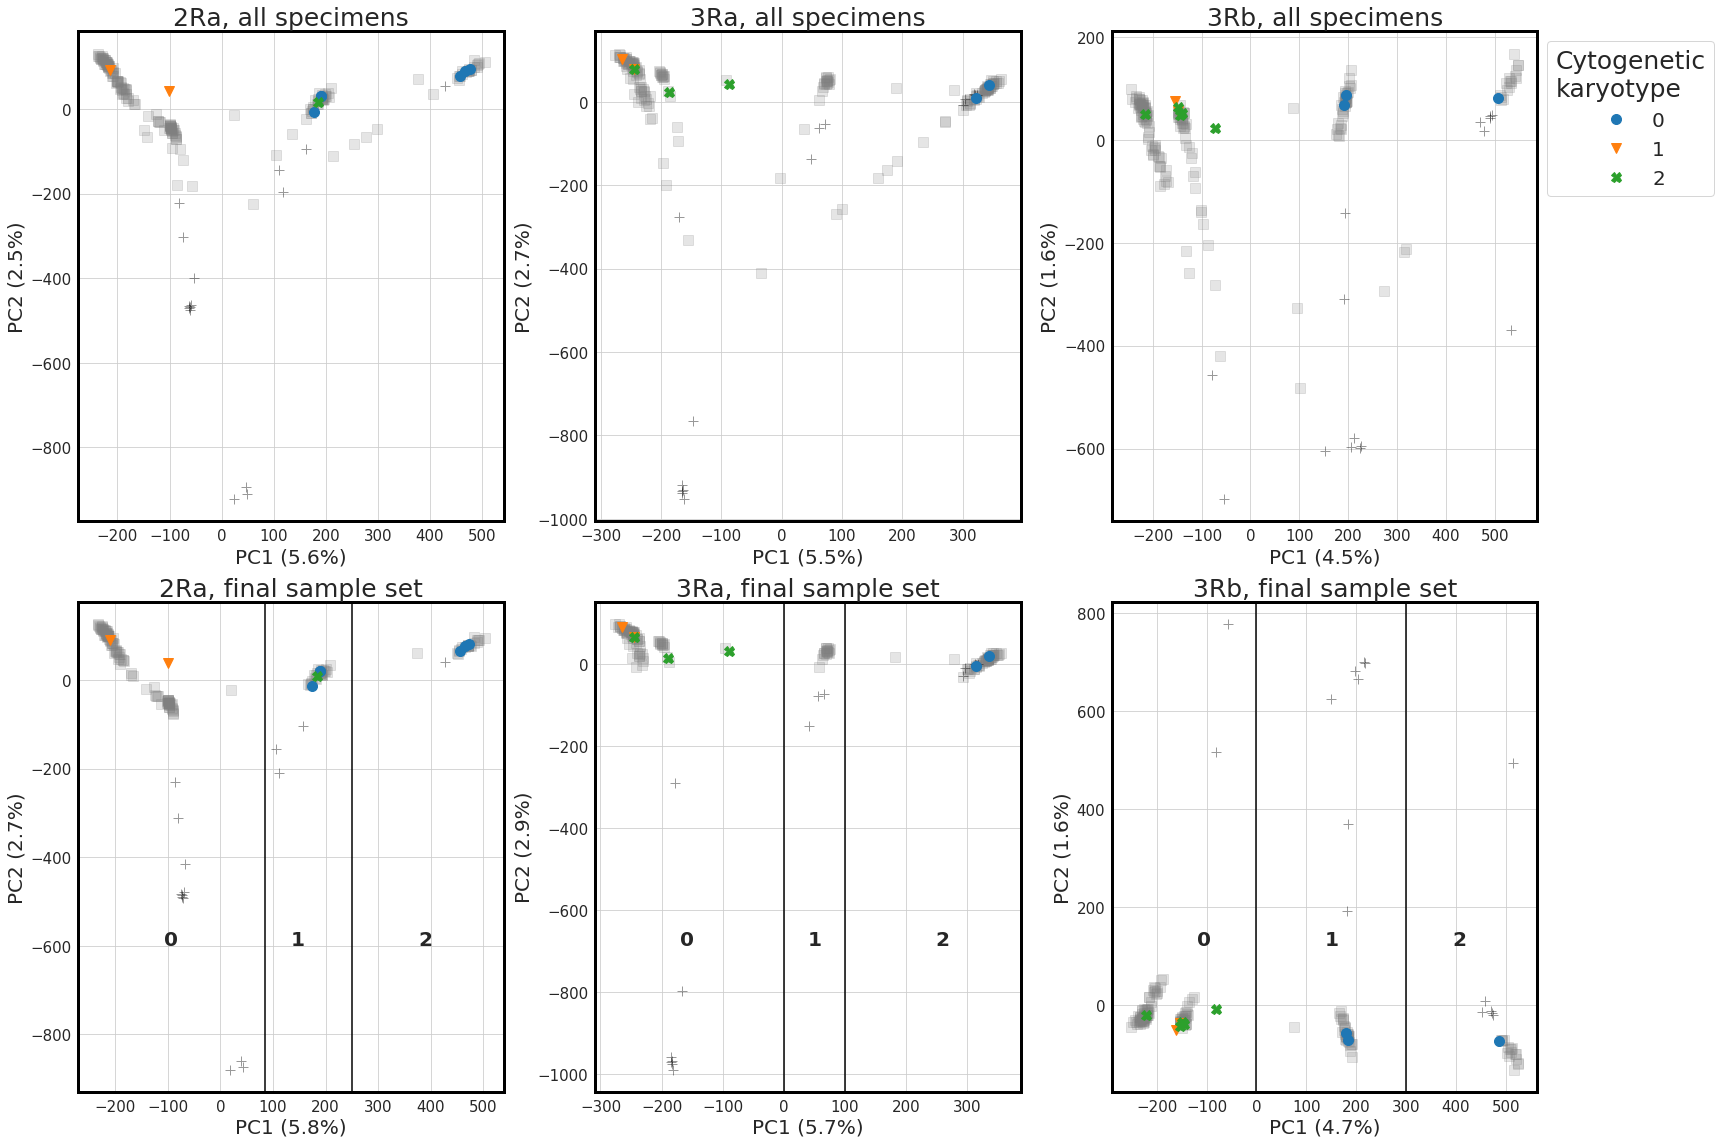

In [61]:
marker_kwaargs = {"fillstyle" : "none", "markeredgewidth" : "1.0"}
sns.set_style('whitegrid')

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (24, 16))

plots = []

for i, inversion in enumerate(coords.keys()):
    
    label_name = inversion + "-cyt"
    
    for j, division in enumerate(["all", "kept"]):
        
        if division == "all":
            
            title = inversion + ", all specimens"
            this_md = md
            
        else:
            
            title = inversion + ", final sample set"
            this_md = md.loc[kept_bool, :]
            
        if j == 0:
            
            title = inversion + ", " +  division + " specimens"
                
        else:

            title = inversion + ", final sample set"
        
        these_coords = coords[inversion][division]
        this_bool = bool_dict[inversion][division]
    
        ##Burkina Faso
        for index, status in enumerate(this_md.loc[this_bool["BF"], label_name].unique()):
            
            flt = (this_md.loc[this_bool["BF"], label_name] == status).values
            
            axes[j][i].plot(these_coords[this_bool["BF"]][:,0][flt], 
                    these_coords[this_bool["BF"]][:,1][flt], 
                     marker="s", linestyle=' ',
                    color = 'grey', markersize=10, alpha=0.2)

        ##non-Burkina Faso
        for index, status in enumerate(this_md.loc[this_bool["outside"], label_name].unique()):
            
            flt = (this_md.loc[this_bool["outside"], label_name] == status).values
            
            axes[j][i].plot(these_coords[this_bool["outside"]][:,0][flt], 
                    these_coords[this_bool["outside"]][:,1][flt], 
                     marker="+", linestyle=' ',
                    color = 'black', markersize=10, alpha = 0.4, **marker_kwaargs)

        ##mismatches
        ingenos.plot_pca_coords(these_coords[this_bool["mismatch"]], 
                                
                                models[inversion][division], 0, 1, axes[j][i], 
                                
                                this_md.loc[this_bool["mismatch"]],
                                
                        region = inversion, label_with = label_name,
                       alpha = 1, title = title, markersize=10)

##add lines indicating genotyping boundaries, and label which partition is which
##2Ra
axes[1][0].axvline(x=85, color = "k")
axes[1][0].axvline(x=250, color = "k")

##3Ra
axes[1][1].axvline(x=0, color = "k")
axes[1][1].axvline(x=100, color = "k")

##3Rb
axes[1][2].axvline(x=0, color = "k")
axes[1][2].axvline(x=300, color = "k")

for ax in axes[1]:
    
    ax.text(.2, .3, "0", fontsize=20, weight = "bold", transform=ax.transAxes)
    ax.text(.5, .3, "1", fontsize=20, weight = "bold", transform=ax.transAxes)
    ax.text(.8, .3, "2", fontsize=20, weight = "bold", transform=ax.transAxes)

##make text bigger
for ax in axes.flatten():
    
    for item in [ax.xaxis.label, ax.yaxis.label]:
        
        item.set_fontsize(20)
        
    ax.tick_params(labelsize=15)
        
    ax.title.set_fontsize(25)
    
    ##turn spines black
    for spine in ax.spines.values():
        
        spine.set_color("black")
        spine.set_linewidth(3)


legend = axes[0][2].legend(bbox_to_anchor=(1, 1), 
                           title="Cytogenetic\nkaryotype", 
                   fontsize=20)

legend.get_title().set_fontsize(25)

plt.tight_layout()

outString = ingenos.make_date_stamp(base + "/results/before_and_after_PCAs_v2")

#plt.savefig(outString, bbox_inches="tight");